In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Load th data set from  the csv file
path = os.getcwd()
DF = pd.read_csv(path + os.path.sep +"insurance.csv")

#Exploring the Dataset
print(DF.head(),'\n','\n')
print(DF.describe(),'\n','\n')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 
 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 
 



[]

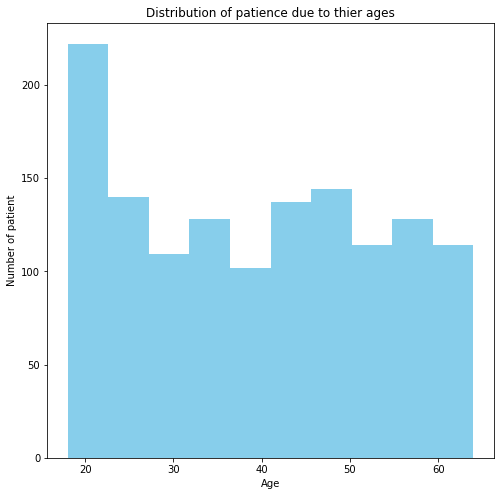

In [3]:
#using filter method             
#visualizing 
plt.figure(figsize=(8,8))
plt.hist(DF['age'],color = "skyblue")
plt.title('Distribution of patience due to thier ages')
plt.xlabel('Age')
plt.ylabel('Number of patient')
plt.plot()
# distribution patients due to thier age unexpected!!!!!!!!!!!!
# Is building two models one for young people and one for  old ones will be a good idea?

[]

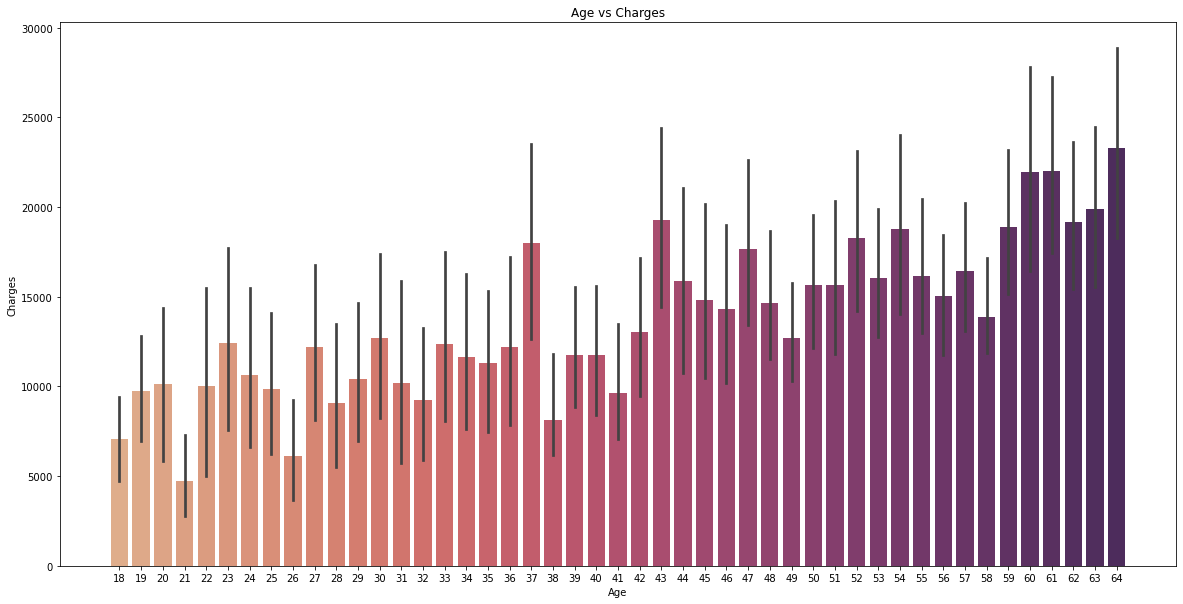

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(x=DF['age'] , y=DF['charges'],color='plum',palette='flare')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.plot()

#'As expected higher the age higher the charges cost' so (age is an important feature)

[]

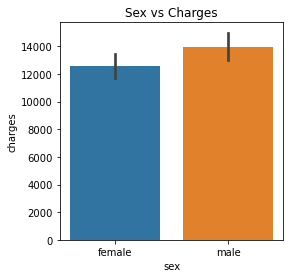

In [5]:
plt.figure(figsize=(4,4))
sns.barplot(x=DF['sex'] , y = DF['charges'])
plt.title('Sex vs Charges')
plt.plot()

#almost the same so it's not an important feature 

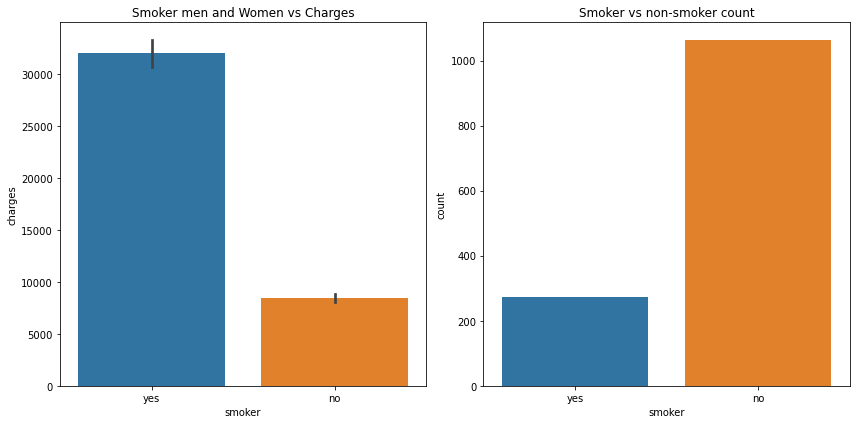

In [6]:
plt.rcParams["figure.figsize"] = [12,6] 
plt.rcParams["figure.autolayout"] = True 

fig, axes = plt.subplots(1, 2)
sns.barplot(x = DF['smoker'] , y = DF['charges'],ax = axes[0])
axes[0].set_title('Smoker men and Women vs Charges')
sns.countplot(x="smoker", data=DF, ax=axes[1])
axes[1].set_title('Smoker vs non-smoker count')
plt.show()

#charges of smokers is so much higher nonsmokers so (smoker is an important feature)

[]

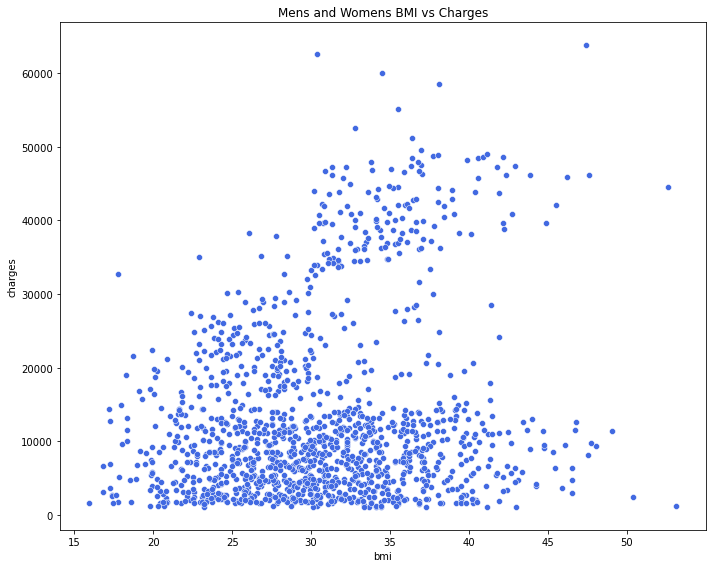

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = DF['bmi'] , y = DF['charges'],color='royalblue')
plt.title('Mens and Womens BMI vs Charges')
plt.plot()

#higher bmi higher charges so (BMI is an important feature)

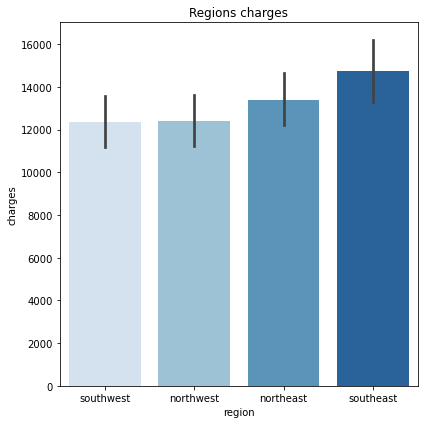

In [8]:
plt.figure(figsize=(6,6))
charg=DF['region'].groupby(DF.region).sum().sort_values()
sns.barplot(x = DF['region'] , y = DF['charges'],palette='Blues',order=['southwest','northwest','northeast','southeast'])
plt.title('Regions charges')
plt.show()

# south east have the highest chareges .. maye becuse of pollution or anything so (Region is an important feature)

[]

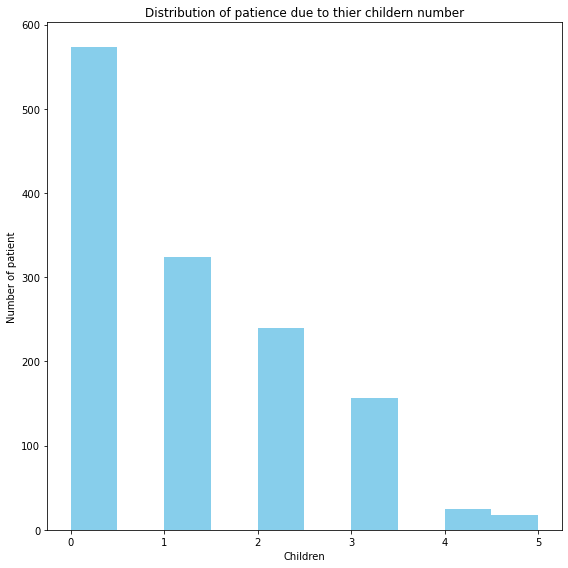

In [9]:
#visualizing 

plt.figure(figsize=(8,8))
plt.hist(DF['children'],color = "skyblue")
plt.title('Distribution of patience due to thier childern number')
plt.xlabel('Children')
plt.ylabel('Number of patient')
plt.plot()


[]

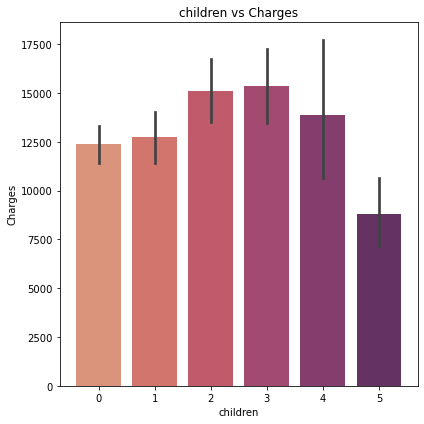

In [10]:
plt.figure(figsize=(6,6))
sns.barplot(x=DF['children'] , y=DF['charges'],color='plum',palette='flare')
plt.title('children vs Charges')
plt.xlabel('children')
plt.ylabel('Charges')
plt.plot()

In [11]:
#preprocessing the data 
print(DF.info(),'\n')
print("""NO NULLS!!!""",'\n')

#handeling categorical features
print('change categorical features into numerical features')

DF.smoker.replace(('yes', 'no'),(1, 0), inplace=True)
DF.sex.replace(('female','male'),(1,0),inplace=True)
DF.region.replace(('northwest','southwest','northeast','southeast'),(1,2,3,4),inplace=True)
print(DF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

NO NULLS!!! 

change categorical features into numerical features
   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       2  16884.92400
1   18    0  33.770         1       0       4   1725.55230
2   28    0  33.000         3       0       4   4449.46200
3   33    0  22.705         0       0       1  21984.47061
4   32    0  28.880         0       0       1   3866.85520


outlayered-Charges mean: 13270.422265141257


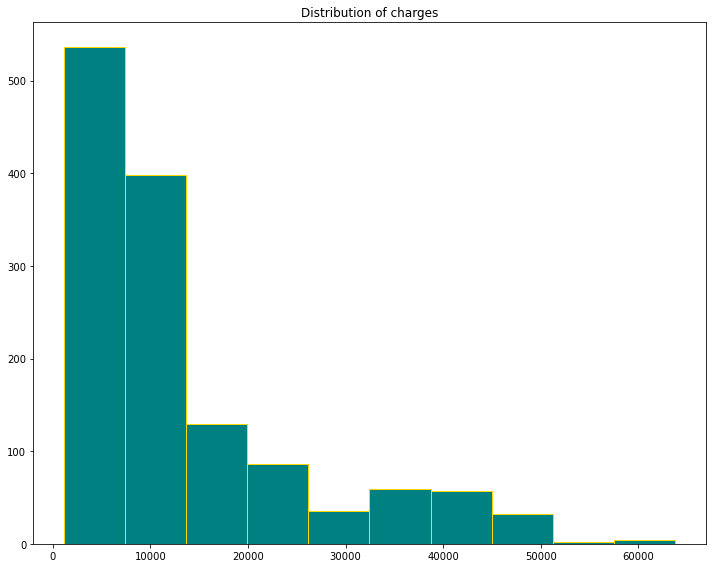

In [12]:
plt.figure(figsize=(10,8))
plt.hist(DF['charges'],color = "teal", ec="gold")
plt.title('Distribution of charges')
plt.plot()

# apperently it has outlayers
print('outlayered-Charges mean:' ,DF['charges'].mean())

In [13]:
#handeling outlayes
for i in DF.columns:
    if DF[i].dtype !='O':
        DF[i] = np.clip(DF[i],DF[i].quantile(0.1),DF[i].quantile(0.95))


Charges without outlayes mean: 13054.9104652702


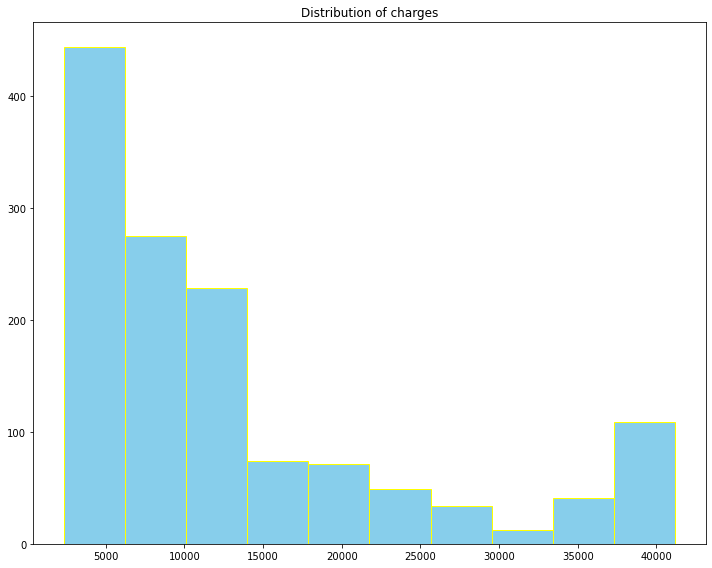

In [14]:
plt.figure(figsize=(10,8))
plt.hist(DF['charges'],color = "skyblue", ec="yellow")
plt.title('Distribution of charges')
plt.plot()

# Outlayers is handeled
print('Charges without outlayes mean:' ,DF['charges'].mean())

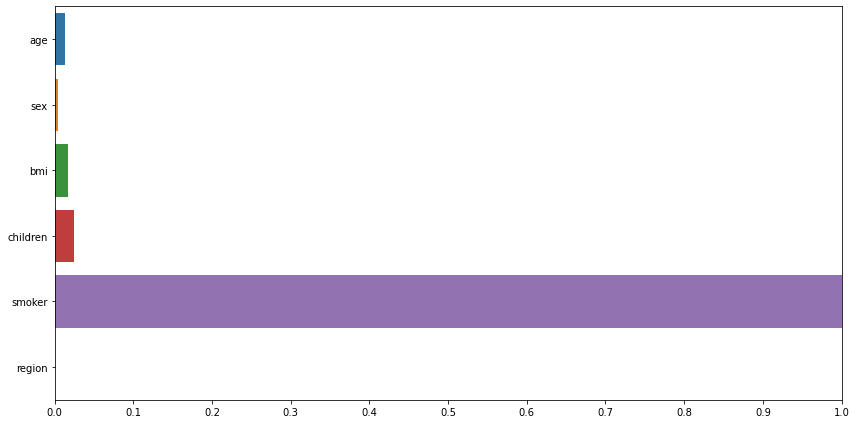

In [15]:
X=DF.drop(["charges"], axis =1)
y=DF['charges']


"""Additionally feature selection"""

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 3)

# Compute  the coefficients
lasso_coef = lasso.fit(X,y).coef_
lasso_coef = (lasso_coef - lasso_coef.min()) / (lasso_coef.max() - lasso_coef.min())

# Plot the coefficients
f, axe = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x=lasso_coef, y = X.columns.values , ax = axe)
axe.set_xlim(0,1)
axe.set_xticks(np.arange(0, 1.1,0.1))
plt.show()

# region is not important and sex has so little effect on predictions the most important feature is somking

In [16]:
#so we split data but without sex and region 
Nw_x = X.drop(["sex" , "region"], axis =1)
x_train,x_test,y_train,y_test=train_test_split(Nw_x,y,test_size=0.252,random_state=20)
x_train

,age,bmi,children,smoker
995,39,23.275,3,0
1033,19,22.990,0,1
536,33,38.900,3,0
286,46,41.106,2,0
768,62,39.700,0,0
...,...,...,...,...
1242,22,22.990,3,0
924,43,23.200,0,0
1247,33,29.400,3,0
271,50,34.200,2,1


In [17]:
# 3 classifiers and their hyperparameters tuning
#handeling outlayes

#LinearRegression model 

linear = LinearRegression().fit(x_train, y_train)

y_pred = linear.predict(x_test)

score_train_lin = cross_val_score(linear, x_train, y_train , cv = 10).mean() * 100

test_lin = r2_score(y_test , y_pred) * 100

print(score_train_lin)
print(test_lin)

74.4071385913706
77.29283372002008


In [18]:
# random forset model with best parameters  

n_estimators = [5,50,100,150] # number of trees in the random forest
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

parameters = {'n_estimators': n_estimators,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

clf_rf = RandomizedSearchCV(RandomForestRegressor(), parameters , scoring = "r2", cv = 10)

clf_rf.fit(x_train, y_train)

y_pred_rf = clf_rf.predict(x_test)

score_train_rf = clf_rf.best_score_ * 100

test_rf = r2_score(y_test , y_pred_rf) * 100

print(score_train_rf)
print(test_rf)
print(clf_rf.best_params_)

83.18114128752259
87.37932220160725
{'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': True}


In [19]:
# svr model with best parameters  

pipe_svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

parameters = {'svr__kernel': ['linear'], 'svr__C':[1, 1.5, 10]}

clf = GridSearchCV(pipe_svr, parameters , scoring = "r2", cv = 10)

clf.fit(x_train , y_train)
 
y_pred = clf.predict(x_test)

score_train_svr = clf.best_score_ * 100

test_svr = r2_score(y_test , y_pred) * 100
print(score_train_svr)
print(test_svr)

45.96863769297762
51.81717576973881


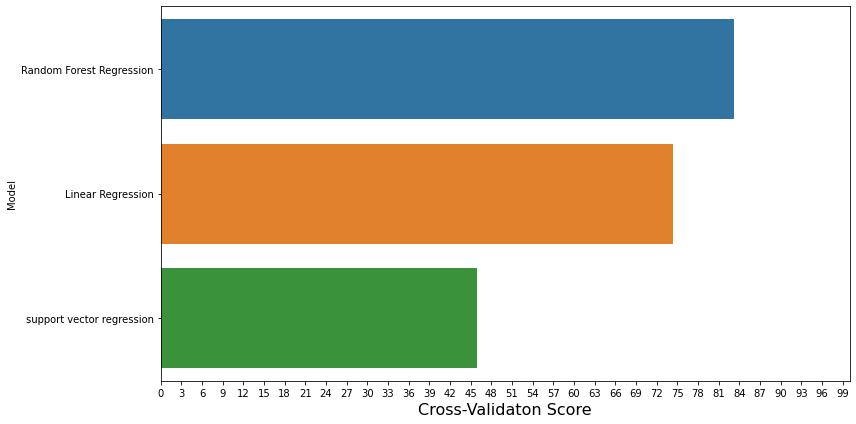

In [20]:
models = [('Linear Regression', score_train_lin , test_lin),
          ("support vector regression",score_train_svr ,test_svr),
          ('Random Forest Regression', score_train_rf, test_rf)   
         ]

df_models = pd.DataFrame(models, columns=['Model', "R2 score (cross validation)" , "R2 score (test)"])


f, axe = plt.subplots(1,1, figsize=(12,6))

df_models.sort_values(by=['R2 score (cross validation)'], ascending=False, inplace=True)

sns.barplot(x='R2 score (cross validation)', y='Model', data = df_models, ax = axe)

axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(1,100)
axe.set_xticks(np.arange(0, 100,3))
plt.show()

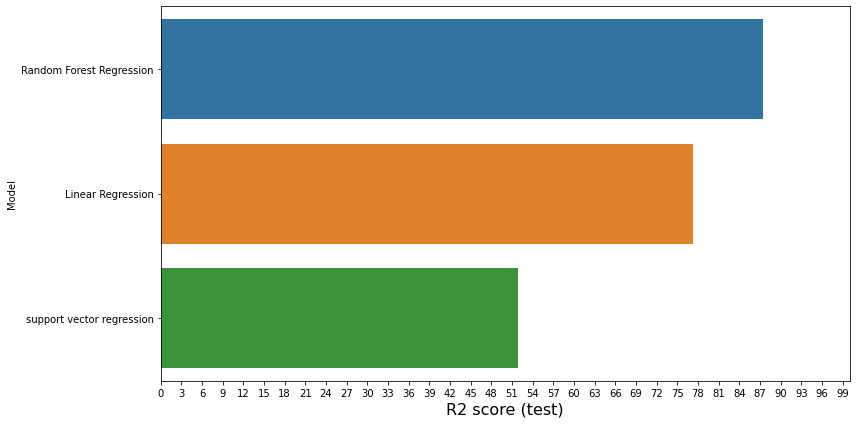

In [21]:
f, axe = plt.subplots(1,1, figsize=(12,6))

df_models.sort_values(by=['R2 score (test)'], ascending=False, inplace=True)

sns.barplot(x='R2 score (test)', y='Model', data = df_models, ax = axe)

axe.set_xlabel('R2 score (test)', size=16)
axe.set_ylabel('Model')
axe.set_xlim(1,100)
axe.set_xticks(np.arange(0, 100,3))
plt.show()